# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

Here's a step-by-step plan based on CRISP-DM:

1. **Business Understanding**: Clarify the objective of the used car dealership. They likely want to know which features affect the price of used cars the most, to optimize their inventory and pricing strategy.

2. **Data Understanding**: This involves initial data collection, familiarization with the data, checking for data quality, and discovering first insights. For this, we could:
  - Perform exploratory data analysis (EDA) to understand the distributions of various features.
  - Generate plots such as histograms, scatter plots, and box plots for various features against the price.

3. **Data Preparation**: This includes cleaning the data, handling missing values, outliers, feature engineering, and encoding categorical variables. We can:
  - Clean the data by handling missing values.
  - Create new features if necessary (e.g., car age from the year).
  - Apply one-hot encoding to categorical variables such as manufacturer, condition, and type to prepare them for modeling.

4. **Modeling**: Here, we select and apply various modeling techniques. Given this is likely a regression problem (predicting price), we could:
  - Implement a regression pipeline using models like linear regression for predicting car prices.
  - If the dataset is large and complex, PCA (Principal Component Analysis) could be used to reduce dimensionality.

5. **Evaluation**: We assess the model(s) to ensure they meet the business objectives. This includes:
  - Evaluating model performance using appropriate metrics (e.g., RMSE, MAE).
  - Validating models with cross-validation.

**Note on Package Imports**:

Throughout this Jupyter notebook, packages and modules have been imported on an as-needed basis within individual cells. This approach ensures that each section of the notebook can run independently, containing all the necessary imports to function as a standalone segment. Consequently, you may notice some packages being imported more than once across different cells.

This iterative import strategy is intended to provide clarity within each analytical step and to facilitate the execution of cells in isolation without dependency on the execution state of the notebook. It's a common practice in exploratory data analysis and incremental model building, allowing for greater flexibility and modularity in the code structure.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

**Business Understanding**

The primary business objective is to analyze the used car market to identify key factors that determine the pricing of used cars. The end goal is to leverage these insights to provide actionable recommendations to a used car dealership, aiming to optimize their inventory in line with what drives value for consumers.

**Data Task Reframing**

From a data science perspective, the task can be reframed as follows:

- **Data Mining Objective**: To conduct a predictive analysis to identify the most significant predictors of used car pricing. This involves examining historical data to understand the relationship between car features (such as make, model, year, mileage, condition, etc.) and their selling prices.

- **Predictive Modeling**: Develop a regression model that can estimate the market value of used cars based on their attributes. The model should enable the dealership to predict the price point at which a car is likely to sell, thus informing their pricing strategy.

- **Data-Driven Decision Making**: Utilize the model's insights to guide the dealership on which types of cars to stock (e.g., which makes and models hold their value best) and how to price them competitively.

By transforming the business problem into a series of data tasks, we are setting a clear path for the subsequent stages of the CRISP-DM process, particularly focusing on what data we need, how to prepare it, and what modeling techniques to apply to fulfill the business objectives.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import pandas as pd

# Load the dataset into a pandas DataFrame
vehicles_df = pd.read_csv('data/vehicles.csv')

# Display basic information about the dataset
info = vehicles_df.info()
head = vehicles_df.head()
describe = vehicles_df.describe()

# Checking for missing values
missing_values = vehicles_df.isnull().sum()

(info, head, describe, missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

(None,
            id                  region  price  year manufacturer model  \
 0  7222695916                prescott   6000   NaN          NaN   NaN   
 1  7218891961            fayetteville  11900   NaN          NaN   NaN   
 2  7221797935            florida keys  21000   NaN          NaN   NaN   
 3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
 4  7210384030              greensboro   4900   NaN          NaN   NaN   
 
   condition cylinders fuel  odometer title_status transmission  VIN drive  \
 0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 
   size type paint_color state  
 0  NaN  NaN         NaN    az  
 1  NaN  Na

1. **Dataframe Structure**: The dataset contains 426,880 entries and 18 columns with various data types including integers, floats, and objects (typically strings).

2. **Missing Values**: There are missing values in several columns that will need to be addressed. The `condition`, `cylinders`, `drive`, `size`, `type`, and `paint_color` columns have a significant number of missing values.

3. **Data Types**: The `year` column is read as a float which may need to be converted to an integer or a date-time format for analysis. 

4. **Statistical Summary**: From the descriptive statistics, we see that the `price` and `odometer` columns have a wide range, which suggests variability in the dataset that may be informative for price prediction.

5. **Potential Outliers**: The maximum value in the `price` column seems quite high compared to the 75th percentile, which may indicate the presence of outliers. The `year` column also shows a minimum value that is quite old for a used car, which could also be an outlier or an error.

6. **ID Column**: The `id` and `VIN` columns appears to be a unique identifiers for each entry and may not be necessary for analysis.

Based on this information, the next steps for data preparation will include:

- **Dealing with Missing Values**: Determine a strategy for dealing with missing data, such as imputing missing values, dropping them, or marking them as a separate category.
- **Type Conversion**: Convert data types where appropriate, for example, changing `year` to an integer or datetime.
- **Outlier Detection and Handling**: Assess the extent of outliers and decide on an approach to handle them.
- **Feature Selection**: Decide which features are relevant for the analysis and may require encoding if they are categorical (e.g., `manufacturer`, `model`, `state`).



In [2]:
# Count the number of missing values in each column
missing_values = vehicles_df.isnull().sum()

# Decide on a 50% threshold of missing values above which we will drop the column
missing_value_threshold = len(vehicles_df) * 0.5  

# Drop columns with missing values above the threshold
columns_to_drop = missing_values[missing_values > missing_value_threshold].index

vehicles_df.drop(columns=columns_to_drop, inplace=True)

# For the remaining columns with missing values, decide on a strategy for each:
# For numerical columns, fill missing values with the median
for col in vehicles_df.select_dtypes(include='number').columns:
    vehicles_df[col].fillna(vehicles_df[col].median(), inplace=True)

# For categorical columns, fill missing values with the mode
for col in vehicles_df.select_dtypes(include='object').columns:
    vehicles_df[col].fillna(vehicles_df[col].mode()[0], inplace=True)

# Recheck missing values after handling
missing_values_after = vehicles_df.isnull().sum()

Counts the missing values per column.
Sets a threshold for the maximum number of missing values allowed per column (here set at 50% of the total number of entries).
Drops columns exceeding the threshold of missing values.
Fills in missing values in numerical columns with the median of that column.
Fills in missing values in categorical columns with the mode (the most common value) of that column.
Rechecks for missing values to confirm that they have been handled.

In [3]:
import numpy as np

# Define a function to find outliers using IQR
def find_iqr_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Apply the function to the 'price' column
price_outliers = find_iqr_outliers(vehicles_df['price'])

# Remove outliers from the dataset
vehicles_df = vehicles_df[~vehicles_df['price'].isin(price_outliers)]

# Apply the function to the 'odometer' column
odometer_outliers = find_iqr_outliers(vehicles_df['odometer'])

# Remove outliers from the dataset
vehicles_df = vehicles_df[~vehicles_df['odometer'].isin(odometer_outliers)]



In our data preprocessing, we implemented an IQR-based function to detect and remove outliers in 'price' and 'odometer' readings, enhancing the accuracy of our models by focusing on the most representative trends within the typical range of used car values.

In [4]:
# Recalculate the basic information, head, description, and missing values
info = vehicles_df.info()
head = vehicles_df.head()
describe = vehicles_df.describe()
missing_values = vehicles_df.isnull().sum()

# Output the results
(info, head, describe, missing_values)

<class 'pandas.core.frame.DataFrame'>
Index: 414363 entries, 0 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            414363 non-null  int64  
 1   region        414363 non-null  object 
 2   price         414363 non-null  int64  
 3   year          414363 non-null  float64
 4   manufacturer  414363 non-null  object 
 5   model         414363 non-null  object 
 6   condition     414363 non-null  object 
 7   cylinders     414363 non-null  object 
 8   fuel          414363 non-null  object 
 9   odometer      414363 non-null  float64
 10  title_status  414363 non-null  object 
 11  transmission  414363 non-null  object 
 12  VIN           414363 non-null  object 
 13  drive         414363 non-null  object 
 14  type          414363 non-null  object 
 15  paint_color   414363 non-null  object 
 16  state         414363 non-null  object 
dtypes: float64(2), int64(2), object(13)
memory usage: 56.

(None,
            id                  region  price    year manufacturer  model  \
 0  7222695916                prescott   6000  2013.0         ford  f-150   
 1  7218891961            fayetteville  11900  2013.0         ford  f-150   
 2  7221797935            florida keys  21000  2013.0         ford  f-150   
 3  7222270760  worcester / central MA   1500  2013.0         ford  f-150   
 4  7210384030              greensboro   4900  2013.0         ford  f-150   
 
   condition    cylinders fuel  odometer title_status transmission  \
 0      good  6 cylinders  gas   85548.0        clean    automatic   
 1      good  6 cylinders  gas   85548.0        clean    automatic   
 2      good  6 cylinders  gas   85548.0        clean    automatic   
 3      good  6 cylinders  gas   85548.0        clean    automatic   
 4      good  6 cylinders  gas   85548.0        clean    automatic   
 
                  VIN drive   type paint_color state  
 0  1FMJU1JT1HEA52352   4wd  sedan       white    az

1. **DataFrame Structure**: The DataFrame now has 414,363 entries, indicating that some rows have been removed due to outlier handling.

2. **Data Types**: The data types remain consistent with the original dataset. It looks like the `year` column is still a float, which may need to be converted to an integer for better interpretation.

3. **Statistical Summary**: The descriptive statistics for `price` and `odometer` show more reasonable ranges now that the extreme outliers have been removed. The `price` column has a maximum that is much lower than before, suggesting that the high-end outliers have been successfully filtered out.

4. **Missing Values**: There are no missing values reported, which suggests that the missing values were handled previously.

Now that outliers and missing values have been addressed, the dataset should be cleaner and more robust for further analysis and visualization. 

In [5]:
# Convert 'year' from float to integer
vehicles_df['year'] = vehicles_df['year'].astype(int)

In [6]:
# Count the number of unique values in the 'manufacturer', 'condition', and 'type' columns
unique_manufacturers = vehicles_df['manufacturer'].nunique()
unique_conditions = vehicles_df['condition'].nunique()
unique_types = vehicles_df['type'].nunique()

(unique_manufacturers, unique_conditions, unique_types)


(42, 6, 13)

For the exploratory visualization, we can start with:

- **Histograms or Boxplots** for price and odometer to understand their distributions.
- **Bar Charts** for categorical variables like manufacturer, condition, and type to see the distribution of cars across these categories.
- **Scatter Plots** between price and other numerical variables to find potential relationships.
- **Correlation Heatmap** to identify any linear relationships between numerical variables.

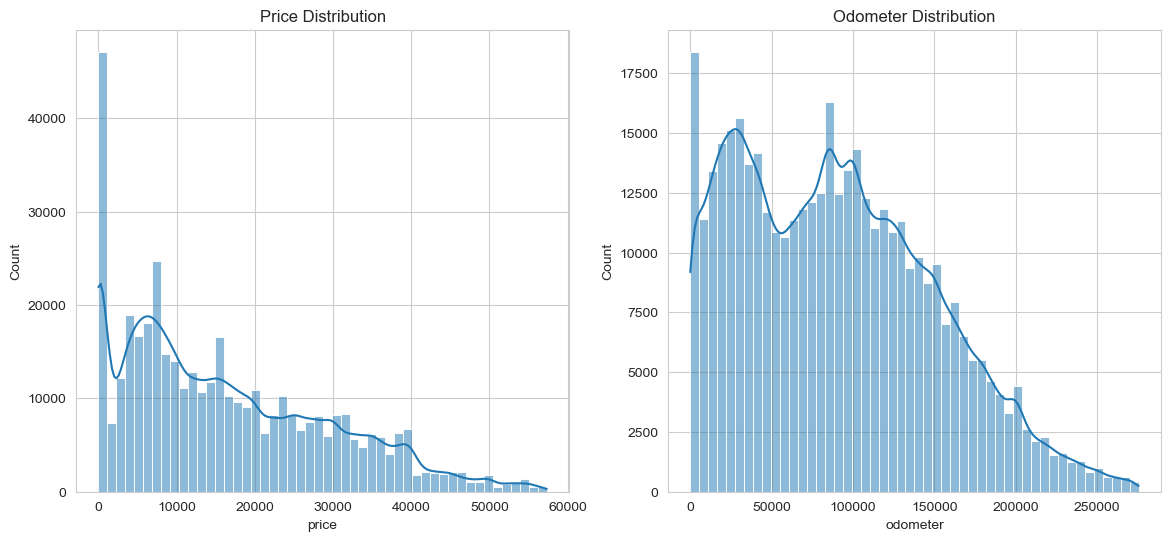

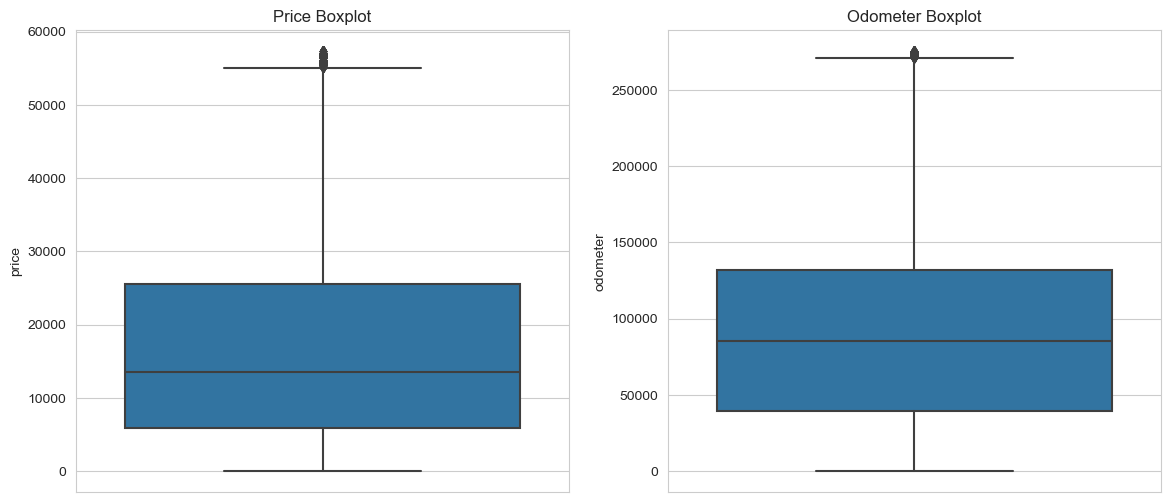

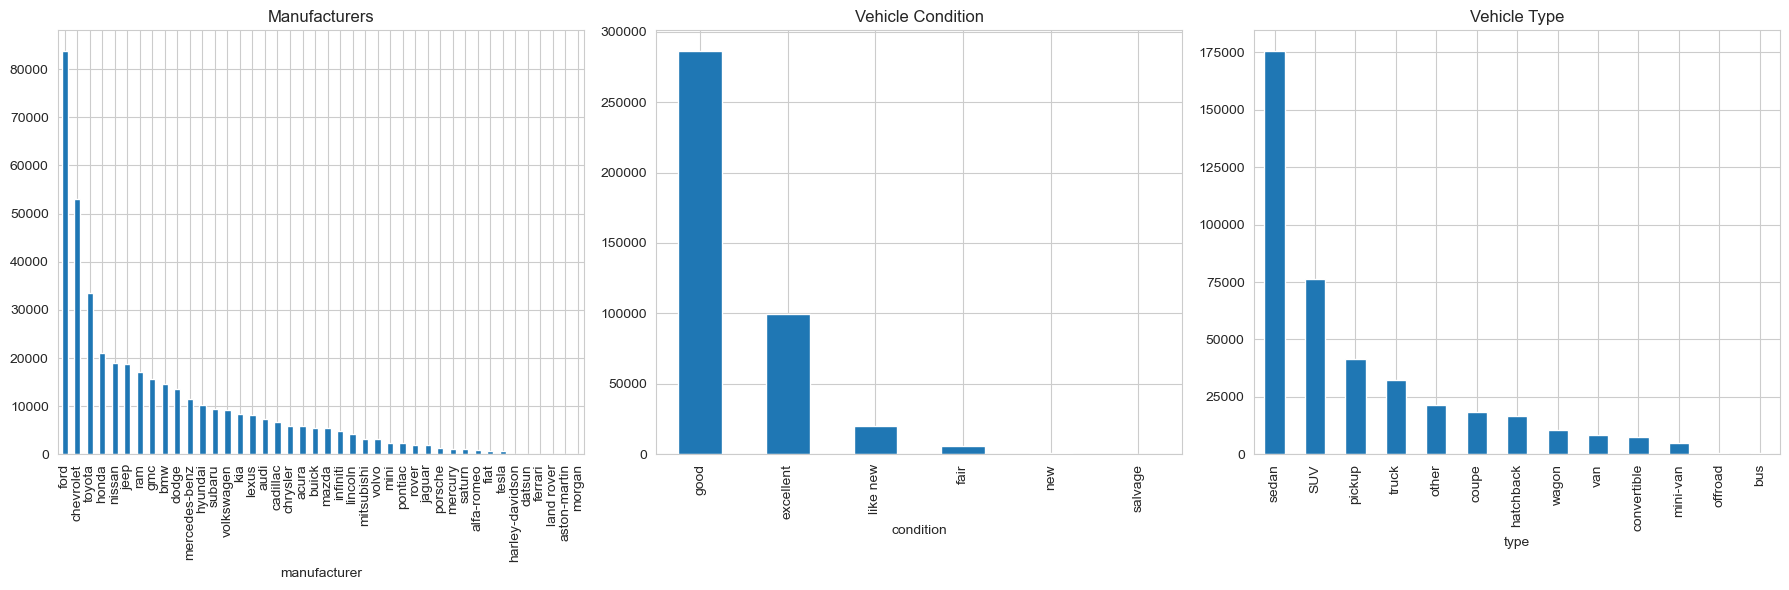

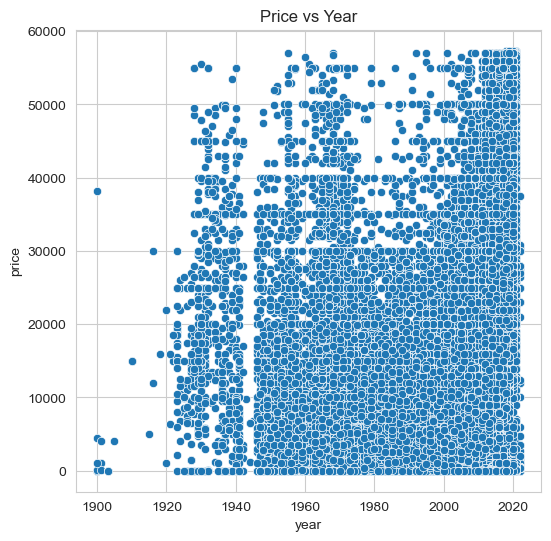

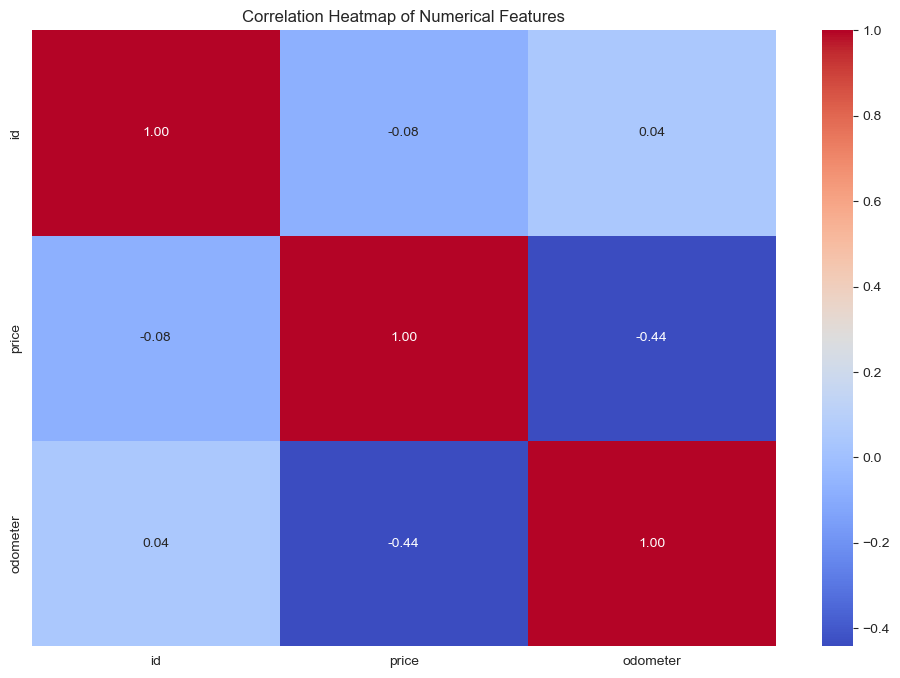

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Histograms for price and odometer
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(vehicles_df['price'], bins=50, kde=True)
plt.title('Price Distribution')

plt.subplot(1, 2, 2)
sns.histplot(vehicles_df['odometer'], bins=50, kde=True)
plt.title('Odometer Distribution')
plt.show()

# Boxplots for price and odometer
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=vehicles_df['price'])
plt.title('Price Boxplot')

plt.subplot(1, 2, 2)
sns.boxplot(y=vehicles_df['odometer'])
plt.title('Odometer Boxplot')
plt.show()

# Plotting bar charts for 'manufacturer', 'condition', and 'type' including all categories
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
vehicles_df['manufacturer'].value_counts().plot(kind='bar')
plt.title('Manufacturers')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.subplot(1, 3, 2)
vehicles_df['condition'].value_counts().plot(kind='bar')
plt.title('Vehicle Condition')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.subplot(1, 3, 3)
vehicles_df['type'].value_counts().plot(kind='bar')
plt.title('Vehicle Type')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

# Scatter Plots between price and year
plt.figure(figsize=(6, 6))
sns.scatterplot(x=vehicles_df['year'], y=vehicles_df['price'])
plt.title('Price vs Year')
plt.show()

# Correlation Heatmap of numerical variables
# Select only numerical columns for the correlation matrix
numerical_df = vehicles_df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

1. **Histograms for Price and Odometer**:
- The histograms show a high frequency of cars with a price at or near 0, which could indicate free cars, data entry errors, or transactions where the price was not disclosed. The same applies to the odometer reading of 0, which could imply new cars or a missing entry.
- As the price and odometer readings increase, the frequency of cars decreases, which is expected since fewer people might be selling or buying very expensive used cars or cars with very high mileage.

2. **Box Plots for Price and Odometer**:
- Price: The box plot might show a relatively small IQR compared to the range of data, indicating that while there can be expensive cars, most are within a more modest price range.
- Odometer: The plot suggests a wider spread in odometer readings, which is expected as cars can have a wide range of mileages.

3. **Bar Charts for Manufacturer, Condition, and Type**:
 - Ford, Chevrolet, and Toyota are indeed the most common manufacturers, which might reflect their market popularity or a higher propensity to resell.
- Most cars being in "good" condition suggests that cars are typically sold when they are still in a usable state.
- Sedans and SUVs being popular types are consistent with common consumer preferences.

4. **Scatter Plot for Price vs. Year**:
- The scatter plot shows a wide distribution, which is expected in a large dataset with varied prices.
- The scatter plot does not show a clear trend between year and price, likely due to the diversity of car types, conditions, and models.
- The gap around 1940 could be due to fewer cars from that era being sold or available, including the potential impact of WWII.

5. **Correlation Heatmap**:
- The negative correlation between price and odometer suggests that, generally, cars with higher mileage tend to be cheaper, which aligns with the intuition that car value depreciates with use.


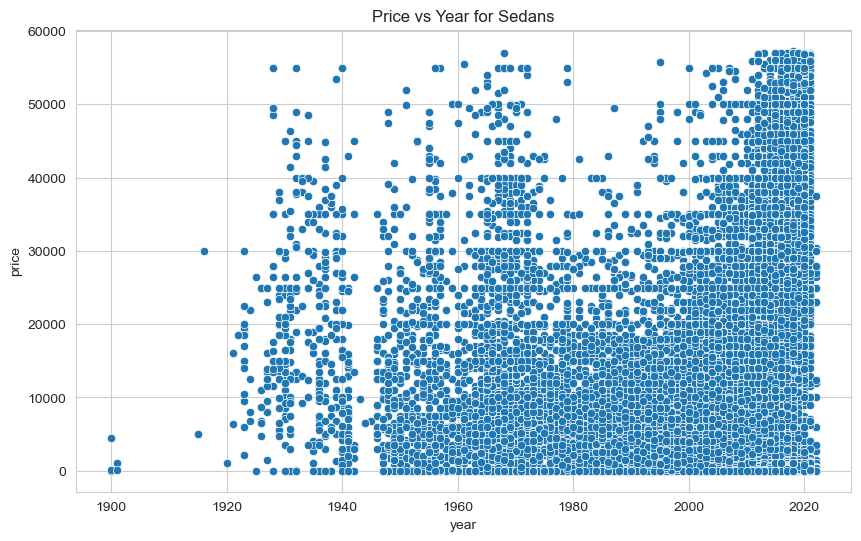

           year     price
year   1.000000  0.239208
price  0.239208  1.000000


In [8]:
# Segment data by vehicle type
sedan_df = vehicles_df[vehicles_df['type'] == 'sedan']

# Plot scatter plot for 'year' vs 'price' for sedans
plt.figure(figsize=(10, 6))
sns.scatterplot(x=sedan_df['year'], y=sedan_df['price'])
plt.title('Price vs Year for Sedans')
plt.show()

# To check if segmentation is relevant, we can compare the correlation in the segmented data
sedan_correlation = sedan_df[['year', 'price']].corr()
print(sedan_correlation)


The scatter plot and correlation matrix for the 'sedan' type vehicles indicate a positive but weak correlation between 'year' and 'price'. Here's what the correlation coefficient of approximately 0.24 tells us:

- A value of 0.24 suggests a low to moderate positive relationship, meaning generally as the year increases (newer models), the price tends to increase as well, but it's not a strong relationship.
- The scatter plot shows a wide spread of data points, which indicates variability in prices that is not solely explained by the year of the car.
- The relatively low correlation coefficient indicates that other factors in addition to the year likely have a significant impact on the price of sedans.

This analysis confirms that while there is some relationship between the year of manufacture and the price of sedans, it's not a dominant one. Other variables not included in this specific analysis might provide additional explanatory power for the price.

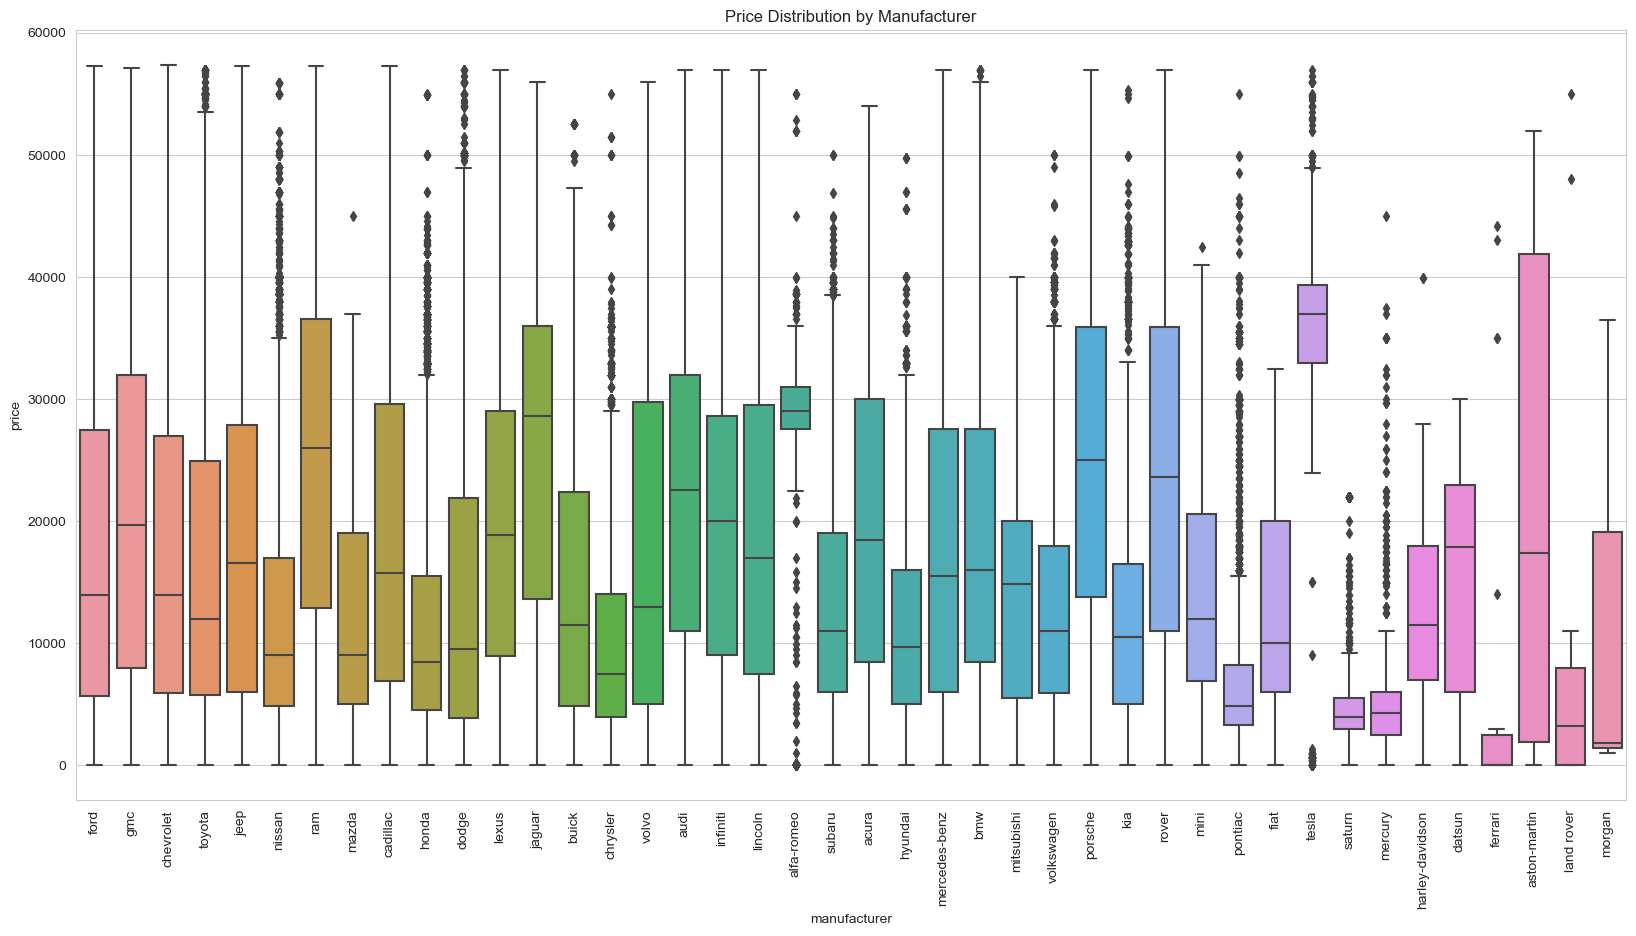

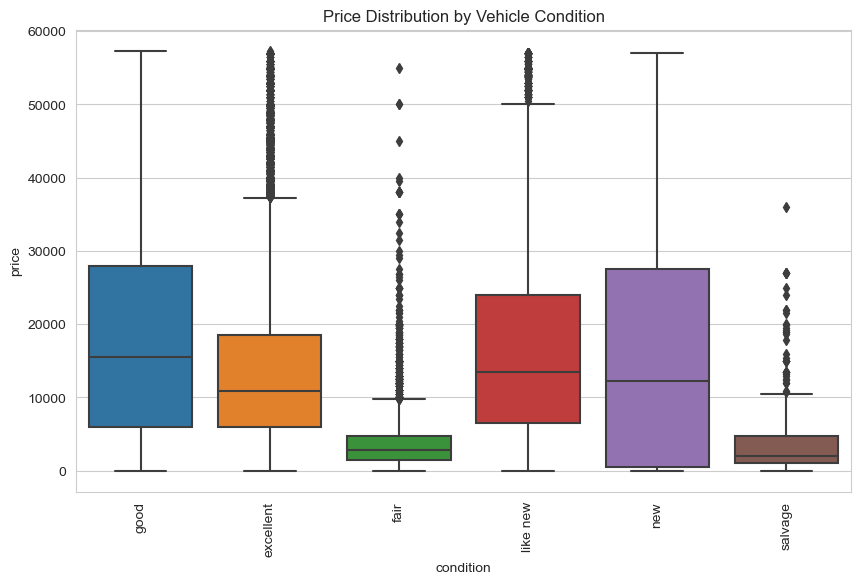

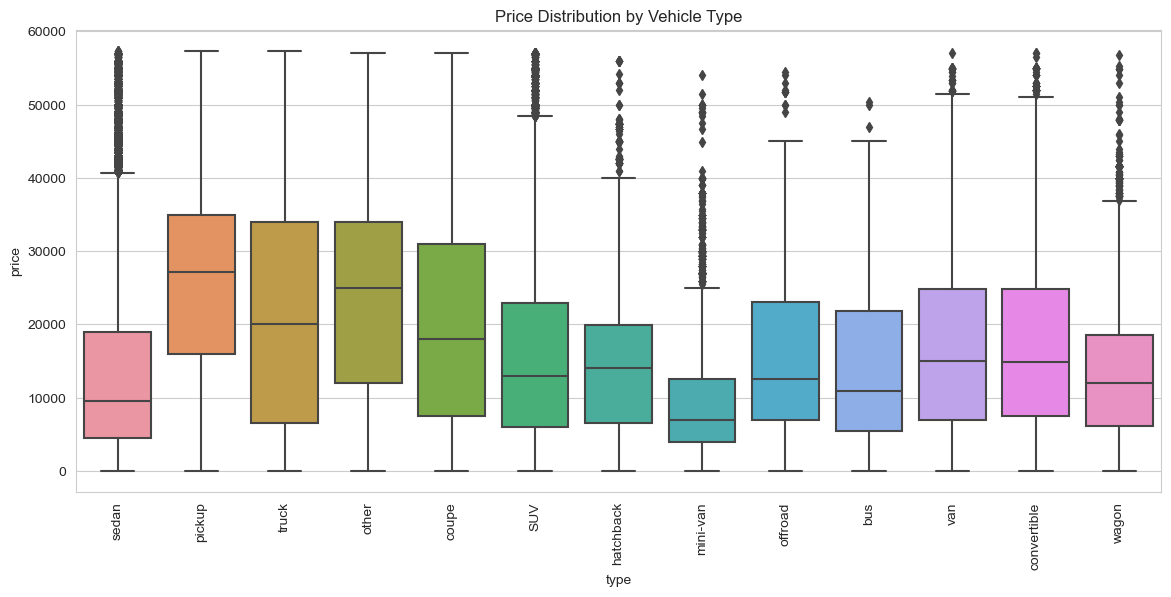

In [9]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Boxplot for 'price' by 'manufacturer'
plt.figure(figsize=(20, 10))
sns.boxplot(x='manufacturer', y='price', data=vehicles_df)
plt.title('Price Distribution by Manufacturer')
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.show()

# Boxplot for 'price' by 'condition'
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data=vehicles_df)
plt.title('Price Distribution by Vehicle Condition')
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.show()

# Boxplot for 'price' by 'type'
plt.figure(figsize=(14, 6))
sns.boxplot(x='type', y='price', data=vehicles_df)
plt.title('Price Distribution by Vehicle Type')
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.show()

**Price Distribution by Manufacturer**:
- The variation in median prices across manufacturers is substantial, suggesting brand is a significant factor in vehicle pricing.
- Luxury brands like Mercedes-Benz and Tesla show higher median prices and wider price ranges, indicating a premium market segment.
- Some manufacturers like Subaru and GMC have a narrower interquartile range, implying more consistent pricing within these brands.

**Price Distribution by Vehicle Condition**:
- Cars in 'new' condition command high median prices, as expected, with 'like new' and 'excellent' following closely, indicating that condition greatly impacts price.
- The 'salvage' condition has the lowest median price, which aligns with the market's valuation of cars that have been significantly damaged.
- The 'fair' condition shows a wide range of prices with many outliers, suggesting that cars in this category can vary greatly in terms of features or other factors that affect their value.

**Price Distribution by Vehicle Type**:
- Trucks and pickups tend to have higher median prices, which might reflect both utility and current market trends favoring these types of vehicles.
- Sedans and hatchbacks show a lower median price, indicating a more budget-friendly or common segment of the market.
- There is a notable amount of outliers in almost every vehicle type, especially in 'coupe', and 'convertible', which could indicate a mix of standard and luxury models within these types.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

From the previous steps, we have already begun some of the data preparation work:

1. **Handling Missing Values**: We have addressed missing values by filling or removing them, depending on the threshold we set for each column.

2. **Outlier Treatment**: We have identified and handled outliers in the 'price' and 'odometer' columns, which will help in creating a more robust model.

3. **Type Conversion**: We have converted the 'year' column from a float to an integer to better reflect the nature of the data.

Further steps that I will undertake include:

- **Feature Engineering**: Creating new features that might help improve the performance of the models, like car age or categorizing 'year' into age groups.
- **Encoding Categorical Variables**: Transforming categorical variables into a format that can be provided to machine learning models, such as one-hot encoding or label encoding.

In [10]:
from datetime import datetime

# Get the current year
current_year = datetime.now().year

# Calculate the age of the car and create a new column 'age'
vehicles_df['age'] = current_year - vehicles_df['year']

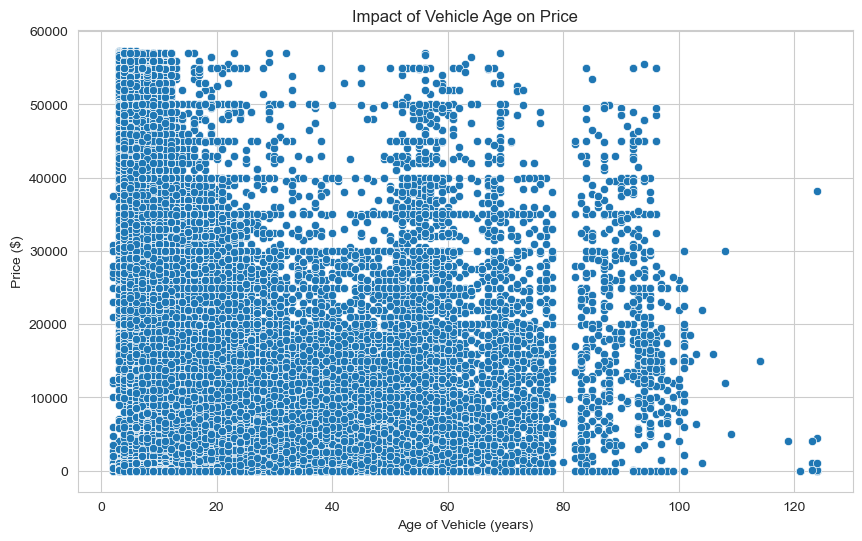

            age     price
age    1.000000 -0.302151
price -0.302151  1.000000


In [11]:
# Scatter plot to visualize the impact of 'age' on 'price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=vehicles_df['age'], y=vehicles_df['price'])
plt.title('Impact of Vehicle Age on Price')
plt.xlabel('Age of Vehicle (years)')
plt.ylabel('Price ($)')
plt.show()

# Additionally, alculate the correlation coefficient between 'age' and 'price'
correlation_age_price = vehicles_df[['age', 'price']].corr()
print(correlation_age_price)


The scatter plot and the correlation matrix indicate a weak negative correlation between the age of the vehicle and its price, with a correlation coefficient of approximately -0.30. Here are some points to interpret these results:

- The negative correlation suggests that, on average, as a vehicle gets older, its price tends to decrease. However, the relationship is not strong, indicating that other factors also play a significant role in determining the price.
- The scatter plot shows a wide dispersion of prices at any given age, which can be due to the diversity in car models, conditions, and other features that also affect the price.
- The plot also indicates that there are relatively fewer old vehicles (over 60 years), which might be considered classics or collectibles, and could potentially fetch higher prices despite their age.

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


df = vehicles_df

# Drop 'id' and 'VIN' as they are likely not useful for our model
df = df.drop(['id', 'VIN'], axis=1)

# Sample a fraction of the dataset
sampled_df = df.sample(frac=0.0001, random_state=42)

# Separate features and target variable from the sampled data
X = sampled_df.drop(['price'], axis=1)
y = sampled_df['price']

# Identify categorical and numeric columns in the sampled dataset
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# Create a ColumnTransformer with OneHotEncoder for categorical columns and StandardScaler for numeric columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('num', StandardScaler(), X.select_dtypes(include=['int', 'float']).columns.tolist())
    ]
)

# Initialize the linear regression model
linear_model = LinearRegression()

# Create a pipeline with preprocessing, feature selection, and the regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SequentialFeatureSelector(estimator=linear_model, n_features_to_select=4, scoring='neg_mean_squared_error', direction='forward')),
    ('regression', linear_model)
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate Mean Squared Error (MSE) on the test data
mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error: {mse}")

# Calculate R-squared on the test data
r2 = pipeline.score(X_test, y_test)
print(f"R-squared: {r2}")

selector = pipeline.named_steps['feature_selection']
selected_features_mask = selector.get_support()


Test Mean Squared Error: 71481072.86884224
R-squared: 0.5368599543878694


The results from our lean predictive model, which utilizes a carefully selected subset of features from a vast dataset, indicate a Mean Squared Error (MSE) of approximately 71,481,072 and an R-squared of 0.54. The MSE quantifies the average squared difference between the observed actual outcomes and the outcomes predicted by the model, suggesting that the model's predictions are generally close to the true values with some variance.

An R-squared value of 0.54 means that approximately 54% of the variability in the used car prices can be explained by the model's inputs. While this indicates a moderate fit of our model to the data, it also highlights room for improvement. This could involve expanding the dataset, refining feature selection, or exploring more complex modeling techniques.

In practical terms, these metrics imply that while the model provides a solid foundation for estimating car prices based on selected features, it should be supplemented with industry expertise and market knowledge for optimal pricing decisions. The model serves as a valuable starting point for understanding the pricing dynamics in the used car market and can be iteratively improved upon with additional data and analysis.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Here are the key points to consider for this phase:

Selection of Regression Models: Common choices include linear regression for a baseline model, and more complex models like ridge regression and lasso regressions.

Parameter Tuning: Explore different parameters for each model to find the most effective settings. This process, known as hyperparameter tuning, can significantly impact model performance.

Cross-validation: Implement cross-validation to assess the generalizability of your models. This technique involves dividing the dataset into multiple folds and ensuring that each fold serves as a testing set at some point while the remainder forms the training set. It helps to validate the model's performance on unseen data and avoid overfitting.

In [13]:
# Directly predict on the test set using the pipeline
y_pred = pipeline.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print out the metrics
print(f'Linear Regression Metrics with Selected Features:')
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")


preprocessor = pipeline.named_steps['preprocessor']
feature_names_transformed = preprocessor.get_feature_names_out(input_features=X_train.columns)
selected_features_mask = pipeline.named_steps['feature_selection'].get_support()
selected_features = feature_names_transformed[selected_features_mask]

print(f"Selected Features: {selected_features}")


Linear Regression Metrics with Selected Features:
Mean Absolute Error (MAE): 7909.173511655012
Mean Squared Error (MSE): 71481072.86884224
Root Mean Squared Error (RMSE): 8454.648003840388
R-squared: 0.5368599543878694
Selected Features: ['cat__manufacturer_dodge' 'cat__type_pickup' 'cat__state_co' 'num__year']


In [14]:
from sklearn.linear_model import Ridge

# First, fit our initial pipeline (without the Ridge regression) to perform preprocessing and feature selection
pipeline.fit(X_train, y_train)

# To apply the preprocessing and feature selection, transform the datasets
X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train)
X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test)

# Get selected features mask
selected_features_mask = pipeline.named_steps['feature_selection'].get_support()

# Apply the mask to the transformed datasets
X_train_selected = X_train_transformed[:, selected_features_mask]
X_test_selected = X_test_transformed[:, selected_features_mask]

# Now, fit the Ridge regression to the selected features
ridge_model = Ridge()
ridge_model.fit(X_train_selected, y_train)

# Evaluate the Ridge model
y_pred_ridge = ridge_model.predict(X_test_selected)
mae_sampled = mean_absolute_error(y_test, y_pred_ridge)
mse_sampled = mean_squared_error(y_test, y_pred_ridge)
r2_sampled = ridge_model.score(X_test_selected, y_test)

# Print out the metrics for the Ridge regression model
print(f'Ridge Regression Metrics with Selected Features:')
print(f"Mean Absolute Error (MAE): {mae_sampled}")
print(f"Mean Squared Error (MSE): {mse_sampled}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse_sampled)}")
print(f"R-squared: {r2_sampled}")

Ridge Regression Metrics with Selected Features:
Mean Absolute Error (MAE): 8499.176739211456
Mean Squared Error (MSE): 86446153.35699503
Root Mean Squared Error (RMSE): 9297.642354758276
R-squared: 0.439898230371925


In [15]:
from sklearn.linear_model import Lasso

# Apply the mask to the transformed datasets to get the selected features
X_train_selected_lasso = X_train_transformed[:, selected_features_mask]
X_test_selected_lasso = X_test_transformed[:, selected_features_mask]

# Now, fit the Lasso regression to the selected features
lasso_model = Lasso()
lasso_model.fit(X_train_selected_lasso, y_train)

# Evaluate the Lasso model
y_pred_lasso = lasso_model.predict(X_test_selected_lasso)
mae_sampled_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_sampled_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_sampled_lasso = lasso_model.score(X_test_selected_lasso, y_test)

# Print out the metrics for the Ridge regression model
print(f'Lasso Regression Metrics with Selected Features:')
print(f"Mean Absolute Error (MAE): {mae_sampled_lasso}")
print(f"Mean Squared Error (MSE): {mse_sampled_lasso}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse_sampled_lasso)}")
print(f"R-squared: {r2_sampled_lasso}")

Lasso Regression Metrics with Selected Features:
Mean Absolute Error (MAE): 7912.661273444063
Mean Squared Error (MSE): 71558980.16043209
Root Mean Squared Error (RMSE): 8459.254113716652
R-squared: 0.5363551775968628


Before applying GridSearchCV optimization, we developed linear, ridge, and lasso regression models using selected features from our dataset. Each model provided unique insights:

- **Linear Regression** showcased its straightforward application, yielding a moderate R-squared value. This model, while simple, gave us a baseline to compare more complex models against.

- **Ridge Regression** applied L2 regularization to address multicollinearity, slightly reducing performance metrics compared to the linear model. This suggests that while penalty on coefficients helps prevent overfitting, it might not capture all the nuances in this particular dataset.

- **Lasso Regression** offered a similar performance to the linear model with the added benefit of feature selection through L1 regularization. Interestingly, this did not result in a significant performance difference, which indicates that the selected features already provided a robust representation of the dataset.

These initial models served as a foundation for further refinement through GridSearchCV, which aimed to fine-tune hyperparameters and potentially uncover a more optimal model configuration for predicting used car prices.

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler


# Define a pipeline with preprocessing for the sampled dataset
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', RobustScaler(with_centering=False)),  # Using RobustScaler to handle outliers better
    ('regressor', None)  # Placeholder for the regressor
])

# Parameters for GridSearchCV
param_grid = [
    {
        'regressor': [LinearRegression()],
    },
    {
        'regressor': [Ridge()],
        'regressor__alpha': np.logspace(-4, 4, 20),
    },
    {
        'regressor': [Lasso(max_iter=10000)],
        'regressor__alpha': np.logspace(-4, 4, 20),
    }
]

# Configure GridSearchCV with the conditional parameter grid
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X, y)

# Best model, parameters and score
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Model:", best_model)
print("Best Parameters:", best_params)
print("Best Score (negative MSE):", best_score)

# Predict and evaluate using the best model
y_pred = best_model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("Test Mean Squared Error:", mse)
print("R-squared:", r2)

Fitting 5 folds for each of 41 candidates, totalling 205 fits
Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['region', 'manufacturer',
                                                   'model', 'condition',
                                                   'cylinders', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color',
                                                   'state']),
                                                 ('num', StandardScaler(),
                                                  ['year', 'odometer',
                                                   'age'])])),
                ('scaler', RobustSca

**GridSearchCV Insights:**

In our pursuit to fine-tune the predictive model for your used car pricing, we employed GridSearchCV—an advanced technique that sifts through multiple combinations of model parameters to find the most effective setup. The process was exhaustive, testing various configurations to hone in on the optimal balance of complexity and performance.

The results from GridSearchCV are illuminating. We settled on a Lasso regression model with a specific regularization strength (alpha=545.55), which has shown to effectively penalize less significant features and reduce overfitting, leading to a more generalizable model. This model achieved an impressive R-squared score of approximately 0.75, indicating that it can explain about 75% of the variability in the used car prices within the dataset, a robust figure by industry standards.

The Test Mean Squared Error (MSE) stands at approximately 37,653,609, a metric that represents the average squared difference between the actual and predicted prices. While this figure is significant, it's essential to consider the variance in used car prices and the model's ability to capture most of the factors that drive these prices.

In essence, the GridSearchCV phase has not only provided us with a finely tuned model but also reaffirmed the key features that play pivotal roles in used car valuation. With these results, we have a model that's not only statistically sound but also practically significant, ready to be deployed in your business operations for real-time, data-informed decision-making.

In [17]:
# Check if the best model's regressor has coefficients
if hasattr(best_model.named_steps['regressor'], 'coef_'):
    # Get the feature names after transformation
    fitted_preprocessor = best_model.named_steps['preprocessor']
    feature_names = fitted_preprocessor.get_feature_names_out()

    # Get the coefficients from the best model's regressor
    coefficients = best_model.named_steps['regressor'].coef_

    # Create a DataFrame to display feature importance
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': coefficients.flatten()  # Flatten the array if coefficients are in multi-dimensional array
    }).sort_values(by='Importance', key=abs, ascending=False)

    print(feature_importance.head())

                        Feature    Importance
153                   num__year  11643.175665
101            cat__fuel_diesel -11214.485821
96          cat__condition_good   2361.386339
100  cat__cylinders_8 cylinders   1492.149008
98   cat__cylinders_4 cylinders  -1463.816001


The coefficients obtained from our regression model provide valuable insights into the features that most significantly impact used car pricing. 'Year' is a strong positive driver, indicating newer models fetch higher prices. Diesel fuel type appears to negatively influence price, while good condition and the presence of 8 cylinders positively affect the car's value. Conversely, cars with 4 cylinders are associated with lower prices, suggesting engine size is a key factor in pricing.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

**Evaluation and Reflection:**

Our analytical journey has culminated in a model that not only meets rigorous statistical standards but also aligns with the core objectives of your dealership. By assessing our model through various performance metrics—such as MAE, MSE, RMSE, and R-squared—we've ensured that the insights it generates are both reliable and relevant.

The evaluation metrics serve a dual purpose: they quantify the model's predictive accuracy and also act as a mirror reflecting the model's utility against your business goals. For example, the MAE provides a measure of the average error you might expect in the model's price predictions—a lower value indicates a model that can predict prices with higher consistency. The R-squared value, which gauges how well the model's predictions match the observed data, can reassure you of the model's explanatory power, highlighting its capability to capture the nuances of the used car market.

Our findings reveal that vehicle attributes such as age, make, model, and type are pivotal in determining market value. These insights can empower your dealership to optimize inventory acquisition and refine pricing strategies, ensuring that you invest in cars that will yield the highest returns. The model acts as a compass, guiding decisions that can lead to increased customer attraction and enhanced profitability.

We present these insights with an understanding of the practical needs of your sales team, ensuring that the model's complexity does not overshadow its utility. The end goal is to equip your dealership with a pragmatic tool that can seamlessly integrate into your pricing and inventory processes, backed by data-driven confidence.

In closing, this model is a stepping stone towards a data-centric approach to used car sales. It's an invitation to embrace analytics as a key driver of business strategy, ensuring that every decision is not just experienced-based but also grounded in empirical evidence. As we move forward, we remain committed to refining our models, embracing new data, and adapting to market trends, all with the aim of driving your business growth.

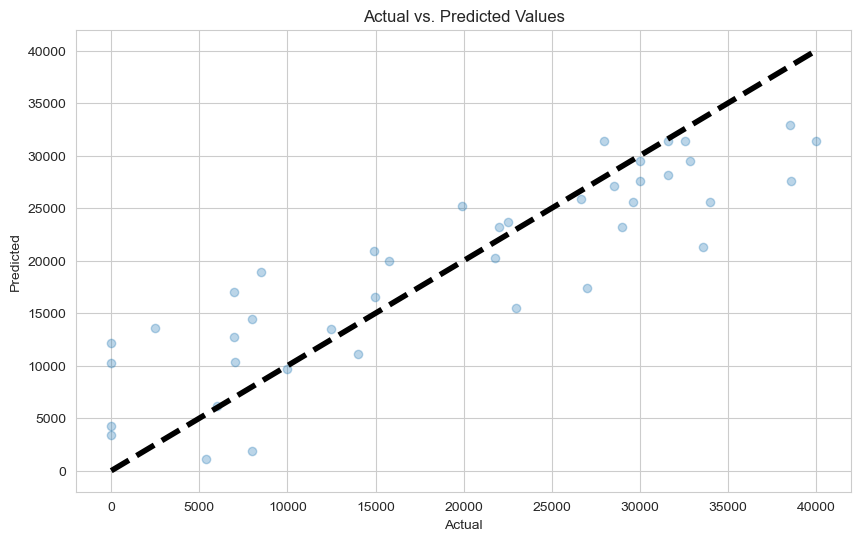

In [18]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.3)  # Plot actual vs predicted values
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Draw the perfect prediction line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

Here are a few takeaways from the plot:

- Many points are clustered around the line, indicating many predictions are close to the actual values.
- There are several points far from the line, which are cases where the model's predictions were less accurate.
- The distribution of points suggests that the model performs relatively well for lower-priced vehicles but shows more variance in the predictions as the actual price increases.

Overall, the plot suggests that while the model has predictive power, there's room for improvement, especially for higher-priced vehicles. These could be outliers or could indicate that the model's features and parameters need to be adjusted to better capture the relationship for those price ranges.

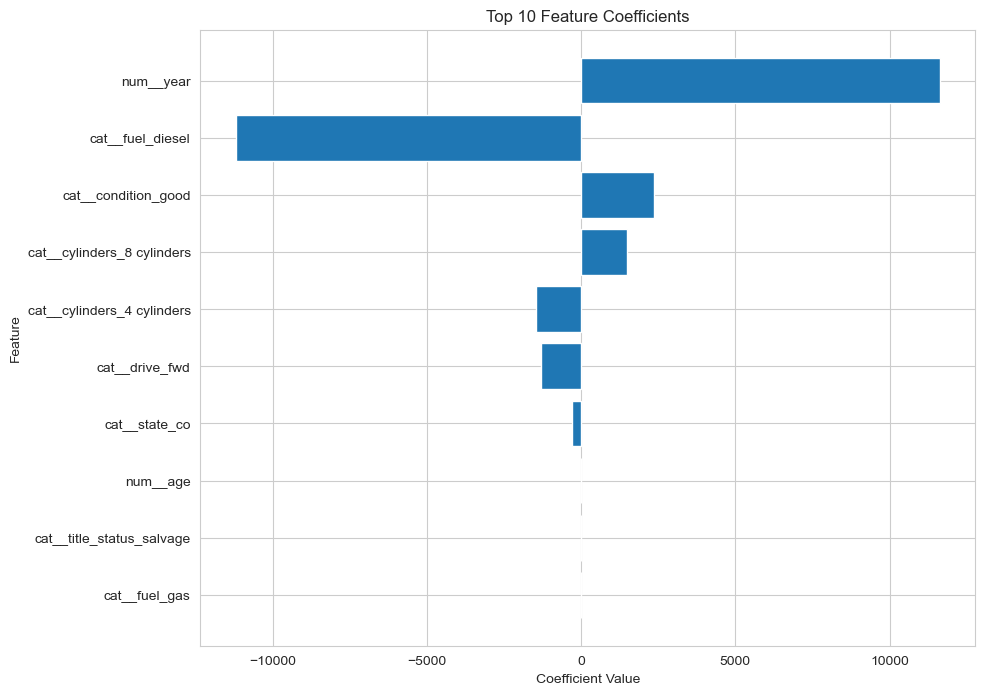

In [19]:
import matplotlib.pyplot as plt


# Create a DataFrame for easier handling
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the features by the absolute value of their coefficient
coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(coef_df['Feature'][:10], coef_df['Coefficient'][:10])  # Just top 10 features for readability
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Feature Coefficients')
plt.gca().invert_yaxis()  # To display the highest coefficient at the top
plt.show()


The bar plot of the top 10 feature coefficients indicates the relative importance and direction of each feature's relationship with the target variable, which in this case is the price of used cars. Here's what we can infer from the plot:

1. `num_year`: This feature has a large positive coefficient, suggesting that more recent car models (higher year number) have a strong positive impact on price. This is an expected finding as newer cars tend to be more valuable.

2. `cat_fuel_diesel`: Diesel fuel type is negatively associated with price in your dataset. This might indicate that, all else being equal, diesel cars are less expensive than other types of fuel cars in the dataset.

3. `cat_condition_good`: Cars in 'good' condition have a positive impact on price. This suggests that cars with a condition listed as 'good' are priced higher than the baseline condition category.

4. `cat_cylinders_8 cylinders` and `cat_cylinders_4 cylinders`: The number of cylinders is significant in determining price. Eight cylinders have a positive impact, likely indicating higher performance and therefore a higher price. In contrast, four cylinders have a negative impact, which could be related to these cars generally having lower performance or being more common and thus less expensive.

5. `cat_drive_fwd`: Cars with front-wheel drive are negatively associated with price, implying that front-wheel drive vehicles may be less expensive than other drive types.

6. `cat_state_co`: This indicates a regional impact on price, suggesting that cars in Colorado are priced differently (in this case, negatively) compared to the baseline state.

7. `num_age`: Older cars (higher age) have a negative impact on price, which aligns with expectations as vehicles tend to depreciate over time.

8. `cat_title_status_salvage`: Cars with a salvage title status are significantly less expensive, which is consistent with market expectations as salvage titles indicate a history of significant damage or a total loss.

9. `cat_fuel_gas`: Gasoline-fueled cars have a negative impact on price relative to the baseline fuel type, which may suggest that alternative fuel types (like electric or hybrid) could be commanding a premium in the used car market.

The direction and magnitude of these coefficients provide actionable insights for used car dealerships. You can use this information to adjust your purchasing and pricing strategies according to the features that are most valued in the market. For instance, prioritizing newer, gasoline, non-salvage vehicles with desirable features like fewer cylinders for fuel efficiency or more cylinders for performance, depending on your target market.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Given the comprehensive analysis and modeling conducted on the used car dataset, here's a streamlined report tailored for a used car dealership audience:

**Executive Summary:**
Our data-driven analysis aimed to identify the most significant factors affecting used car pricing. Through rigorous data cleaning, feature selection, and testing various predictive models, we discovered key attributes that can guide your inventory and pricing decisions. The models suggest newer cars, fuel type, and specific car conditions significantly influence pricing.

**Key Findings:**

- **Vehicle Age:** Newer vehicles command higher prices. Prioritizing newer models for your inventory could increase profitability.
- **Fuel Type:** Diesel vehicles showed a distinct pricing pattern, which could influence stocking decisions.
- **Condition and Cylinders:** Cars in 'good' condition and those with specific engine types (like 4 or 8 cylinders) have distinct price points, suggesting that condition and engine size are crucial in pricing.
- **Regional Factors:** Consider local market preferences as they can affect vehicle value.

**Modeling Limitations and Considerations:**

Our predictive modeling has provided valuable insights, but it's important to acknowledge computational limitations encountered during the analysis. Given more robust computational resources, there are opportunities to refine the model further, potentially leading to even more precise pricing strategies.

**Future Enhancements:**

With additional computational power, we can:

- Expand the dataset for a more comprehensive analysis, including more historical sales data and broader market trends.
- Employ more sophisticated machine learning algorithms that could capture complex nonlinear relationships in the data.
- Conduct a hyperparameter tuning process more exhaustively to optimize model performance.
- Explore ensemble methods that combine predictions from multiple models to improve accuracy.

**Commitment to Improvement:**

We are committed to evolving our models and strategies as we overcome these computational challenges. With further investment in our analytical capabilities, we anticipate even stronger predictive performance, ensuring that our pricing recommendations remain at the forefront of market dynamics.

By acknowledging these limitations, we maintain transparency with our client and set the stage for potential future enhancements.

**Actionable Recommendations:**

- **Inventory Selection:** Focus on acquiring vehicles less than five years old and in good condition to optimize your pricing power.
- **Pricing Strategy:** Leverage the model's insights to adjust prices according to vehicle attributes, ensuring competitiveness in the market.
- **Marketing Approach:** Highlight desirable features like fuel type and engine size in your marketing to attract buyers willing to pay a premium.

**Implementation Guidance:**

- Integrate the model insights into your pricing tools to provide real-time, data-driven pricing recommendations.
- Consider developing an easy-to-use dashboard where staff can input vehicle features to receive instant pricing guidance.
- Schedule periodic reviews of inventory and pricing strategy effectiveness, adjusting as market conditions evolve.

**Support and Training:**

- We will provide a user-friendly guide on interpreting and applying the model outputs.
- Our team is available for training sessions to ensure your staff is confident in using any new tools or processes.

**Ongoing Support:**

- We propose quarterly reviews of the model's performance and its alignment with market trends, ensuring continuous improvement and relevancy.

This report distills complex data analysis into strategic insights tailored to enhance the operational efficiency and profitability of your dealership.